In [ ]:
!pip install --upgrade kaggle

In [11]:
from google.colab import files
uploaded = files.upload()


!mkdir -p ~/.kaggle  # Create the .kaggle directory if it doesn't exist
!mv kaggle.json ~/.kaggle/  # Move the kaggle.json file to the correct location
!chmod 600 ~/.kaggle/kaggle.json  # Set the appropriate permissions

Saving kaggle.json to kaggle.json


In [5]:
# Importar la librería kaggle
import kaggle
import os

# Autentificar la API de Kaggle usando el archivo JSON
kaggle.KaggleApi().authenticate()

In [6]:
# Definir el dataset
dataset = "pranavraikokte/covid19-image-dataset"


# Crear un directorio para el dataset si no existe
if not os.path.exists("covid19-image-dataset"):
    os.makedirs("covid19-image-dataset")

# Descargar los archivos del dataset
kaggle.api.dataset_download_files(dataset, path="covid19-image-dataset", unzip=True)

print("Dataset descargado y descomprimido en el directorio 'covid19-image-dataset'")

Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
Dataset descargado y descomprimido en el directorio 'covid19-image-dataset'


In [7]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ingore the warnings
import warnings
warnings.filterwarnings('ignore')

# DL Libraries
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

# Other libraries

import random

In [9]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/covid19-image-dataset/Covid19-dataset/train/",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/covid19-image-dataset/Covid19-dataset/test/",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [10]:
# Creating a function to visualize the images

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [11]:
# Extrating the class labels
classes = train_ds.class_names

In [12]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

COVID


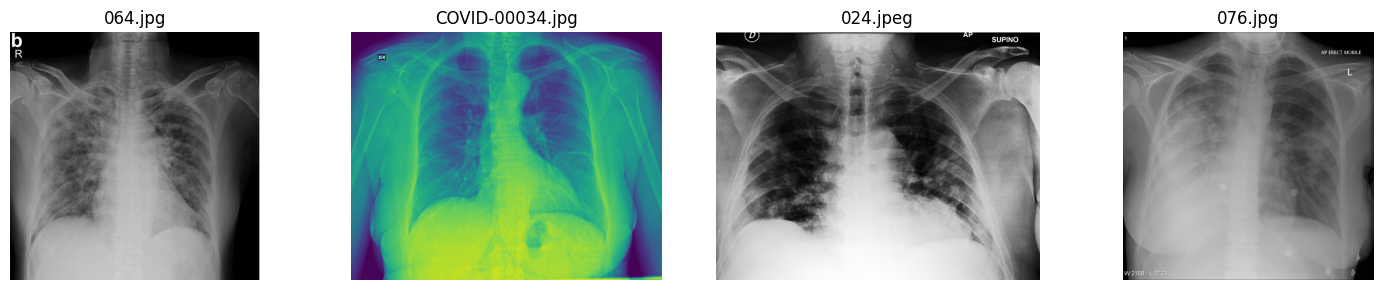

NORMAL


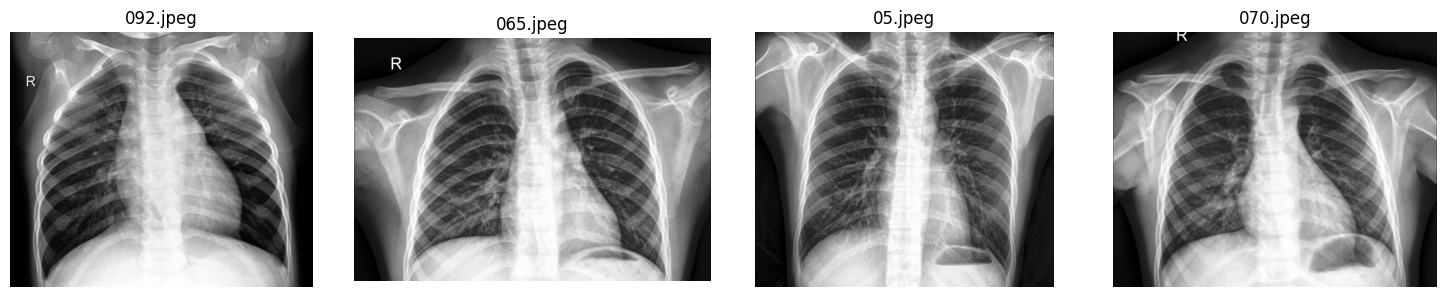

VIRAL PNEUMONIA


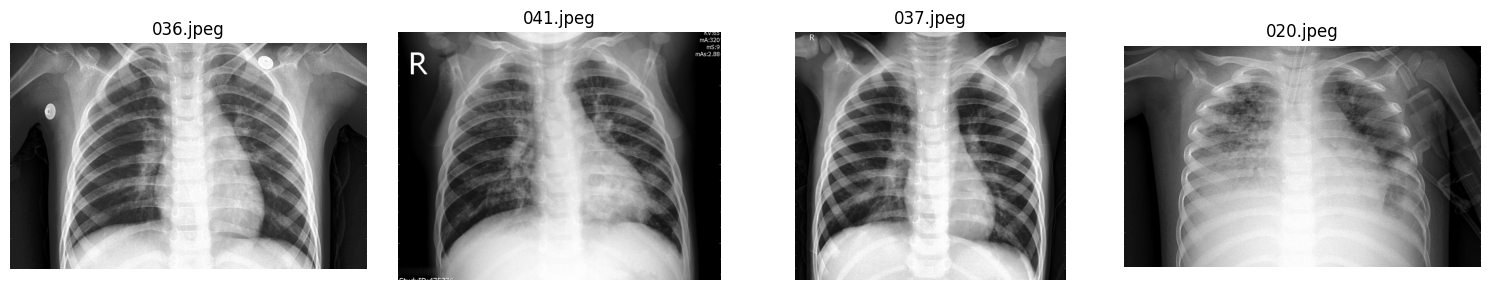

In [13]:
# Iterating through each class to plot its images
for label in classes:

    # Specify the path containing the images to visualize
    path_to_visualize = f"/content/covid19-image-dataset/Covid19-dataset/train/{label}"

    # Visualize 3 random images
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

In [19]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_6 (Dense)             (None, 30)                15483870  
                                                                 
 dense_7 (Dense)             (None, 3)                 93        
                                                                 
Total params: 15484859 (59.07 MB)
Trainable params: 15484859 (59.07 MB)
Non-trainable params: 0 (0.00 Byte)
____________

In [26]:
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [27]:
# Train the model

history = model.fit(train_ds, epochs=20, validation_data=val_ds, verbose=1)

Epoch 1/20
4/4 [==============================] - 19s 3s/step - loss: 15327650816.0000 - accuracy: 0.2550 - val_loss: 228653.9688 - val_accuracy: 0.4242
Epoch 2/20
4/4 [==============================] - 18s 4s/step - loss: 10880416324262035456.0000 - accuracy: 0.3028 - val_loss: 5159431716886869531647405654540288.0000 - val_accuracy: 0.3030
Epoch 3/20
4/4 [==============================] - 17s 3s/step - loss: 697352204882607828297746873319424.0000 - accuracy: 0.2908 - val_loss: 1.0984 - val_accuracy: 0.3030
Epoch 4/20
4/4 [==============================] - 25s 6s/step - loss: 1.0980 - accuracy: 0.3347 - val_loss: 1.0980 - val_accuracy: 0.3939
Epoch 5/20
4/4 [==============================] - 17s 3s/step - loss: 1.0973 - accuracy: 0.4422 - val_loss: 1.0977 - val_accuracy: 0.3939
Epoch 6/20
4/4 [==============================] - 17s 4s/step - loss: 1.0967 - accuracy: 0.4422 - val_loss: 1.0973 - val_accuracy: 0.3939
Epoch 7/20
4/4 [==============================] - 16s 3s/step - loss: 1.0

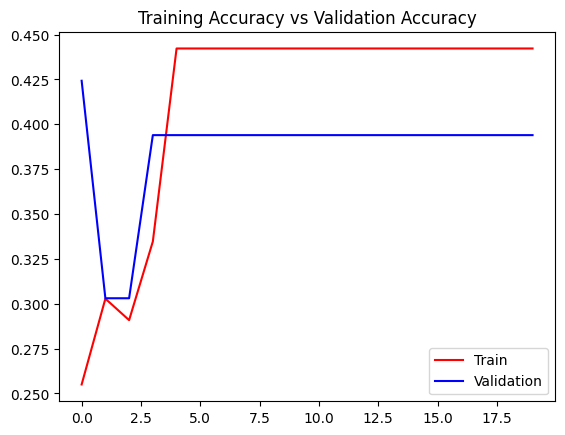

In [28]:
# Plotting the graph of Accuracy and Validation Accuracy
plt.title('Training Accuracy vs Validation Accuracy')

plt.plot(history.history['accuracy'], color='red',label='Train')
plt.plot(history.history['val_accuracy'], color='blue',label='Validation')

plt.legend()

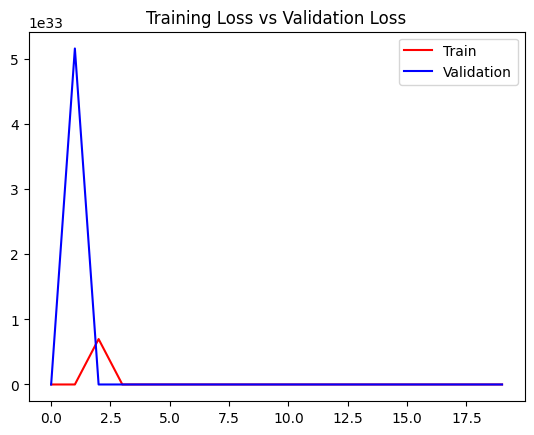

In [29]:
# Plotting the graph of Accuracy and Validation loss
plt.title('Training Loss vs Validation Loss')

plt.plot(history.history['loss'], color='red',label='Train')
plt.plot(history.history['val_loss'], color='blue',label='Validation')

plt.legend()